In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

# Bias - variance tradeoff

En este ejemplo se hace regresion sobre una funcion no lineal con polinomios de distintos grados. El modelo mas simple es aproximar con una recta. A medida que aumento el grado del polinomio incremento la flexibilidad del modelo, pero esto puede tener el problema de reducir mucho el error sobre el conjunto de entrenamiento y aumentar mucho el error sobre el conjunto de prueba.

Se puede demostrar que la esperanza del error cuadratico entre el favor real de la funcion en $x_{0}$ la funcion aproximada se puede descomponer en tres partes:
$$E(y_{0} - \hat{f}(x_{0}))^{2} = Var(\hat{f}(x_{0})) + [Bias(\hat{f}(x_{0}))]^{2} + Var(\epsilon)$$

$Var(\epsilon)$ es un error irreducible, por lo tanto nuestro modelo tiene que minimizar tanto $Var(\hat{f}(x_{0}))$ como $[Bias(\hat{f}(x_{0}))]^{2}$.

El termino $Var(\hat{f}(x_{0}))$ mide cuanto cambia la aproximacion de la funcion si la estimamos con diferentes data sets. 

El termino $[Bias(\hat{f}(x_{0}))]^{2}$ es una medida del error que cometemos al modelar la funcion real con una funcion mas simple que la original.

Por esta razon se habla de tradeoff porque tener un modleo muy simple puede dar mucho error porque la funcion real es mas compleja que la funcion modelo, pero si complejizo la funcion modelo puedo caer en tener mucho error cuando lo evaluo con datos nuevos, es decir, no generaliza bien.

En la implementacion que hice la funcion real es $f(x) = x*sin(x)$. El dataset de entrenamiento y de test lo construyo agregando un ruido gausiano. Luego hago regresion lineal con distintos polinomios de grado creciente y grafico el polinomio que se aprende utilizando linear regression. Se puede ver que a medida que aumento el grado del polinomio se acerca mejor a la curva original.

En el segundo grafico se puede ver como disminuyen los dos errores, pero por lo general el error de test es mayor que el error de training, pero podria darse en algun punto que se invierta.
Existe un punto optimo donde se logra alcanzar achicar los dos errores.
Tambien se puede ver cuando el grado del polinomio es muy grande el error en test crece mucho. Eso se debe a que el modelo esta haciendo overfiting.


In [62]:
def f(x):
    return np.sin(x)*x

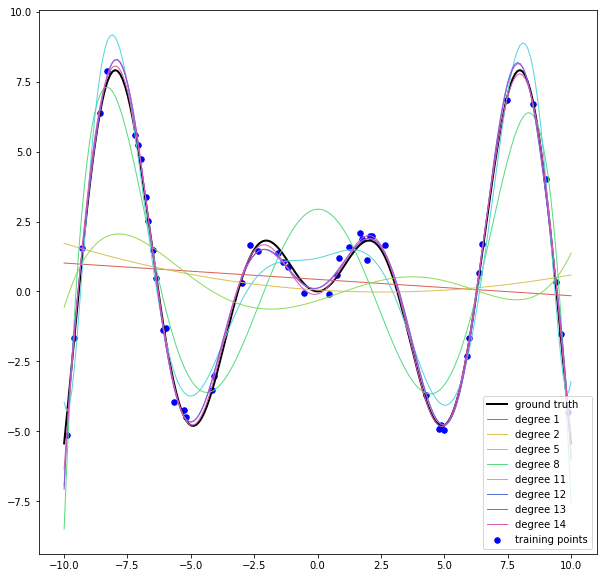

In [63]:
DIM = 200
SAMPLE_DIM = 50
DEGREE_VALUES = [1,2,5,8,11,12,13,14]
X_MAX = 10

x_plot = np.linspace(-X_MAX, X_MAX, DIM)
y_plus_noise = f(x_plot) + np.random.normal(size=DIM, scale=0.3)

sample_indices = np.random.choice(DIM,SAMPLE_DIM,replace=False)

X = x_plot[sample_indices].reshape(-1,1)
y = y_plus_noise[sample_indices].reshape(-1,1)
X_plot = x_plot[:, np.newaxis]
y_plot = f(X_plot)

colors = sns.color_palette("hls", len(DEGREE_VALUES))
lw = 1

plt.figure(figsize=(10,10))
plt.plot(X_plot, y_plot, color='black', linewidth=lw*2,label="ground truth")
plt.scatter(X, y, color='blue', s=30, marker='o', label="training points")

mse_train = []
mse_test = []

for count, degree in enumerate(DEGREE_VALUES):
    model = make_pipeline(PolynomialFeatures(degree,), LinearRegression())
    model.fit(X,y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,label="degree %d" % degree)

plt.legend(loc='lower right')

plt.show()

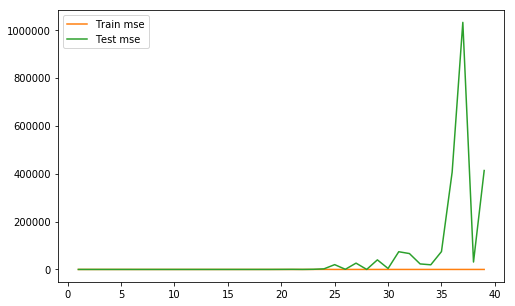

In [87]:
DIM = 200
MAX_DEGREE = 40

x = np.linspace(-X_MAX, X_MAX, DIM)
y_plus_noise = f(x) + np.random.normal(size=DIM, scale=0.3)

sample_indices = np.random.choice(DIM,SAMPLE_DIM,replace=False)

X_train = x_plot[sample_indices].reshape(-1,1)
y_train = y_plus_noise[sample_indices].reshape(-1,1)

sample_indices = np.random.choice(DIM, SAMPLE_DIM,replace=False)
X_test = x_plot[sample_indices].reshape(-1,1)
y_test = y_plus_noise[sample_indices].reshape(-1,1)

mse_train = []
mse_test = []

for degree in range(1,MAX_DEGREE): 
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.5))
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    
plt.figure(figsize=(8,5))
plt.plot([*range(1,MAX_DEGREE)],mse_train, color='C1', label = 'Train mse')
plt.plot([*range(1,MAX_DEGREE)],mse_test, color='C2', label = 'Test mse')
plt.legend(loc='upper left')
plt.show()
    

# Curse of dimensionality

In [57]:
def plot_distance_between_vectors(dim):
    mean = np.zeros(dim)
    cov = np.eye(dim)
    data = pd.DataFrame(data=np.random.multivariate_normal(mean, cov, 7000))
    diff = data - data.shift(axis=0)
    norm_differences = pd.Series(np.linalg.norm(diff.as_matrix(), axis=1))
    norm_differences.hist(bins=100)

Esta funcion calcula la distancia enter los vectores generados con una gausiana multivariada dependiendo de la dimension. Ante una misma cantidad de vectores generados en este caso 5000 se puede ver que a medida que aumento la dimension los vectores se alejan mas, por lo tanto para tener una misma densidad en mas dimensiones hay que tener mas vectores generados.

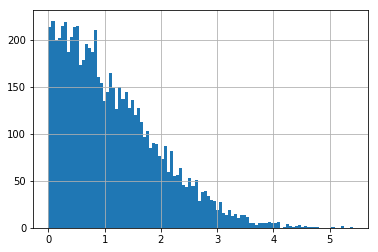

In [58]:
plot_distance_between_vectors(1)

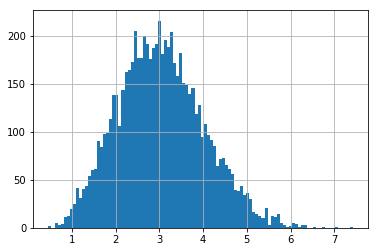

In [59]:
plot_distance_between_vectors(5)

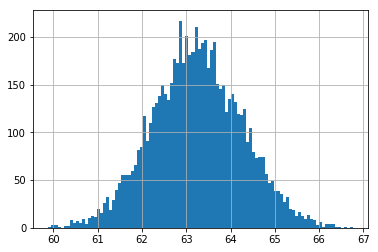

In [60]:
plot_distance_between_vectors(2000)

In [34]:
def plot_vector_norm_distribution(dim):
    mean = np.zeros(dim)
    cov = np.eye(dim)
    data = np.random.multivariate_normal(mean, cov, 5000).T
    pd.Series(np.linalg.norm(data, axis=0)).hist(bins=100)

En este experimento se generan vectores con una distribucion gausiana multivariada con media 0 (vector) y matriz de covarianza igual a la identidad. En el caso de dim = 1 es equivalente a la normal(0,1).
Despues calculo la norma de todos vectores y grafico la distribucion en funcion de la norma para ver donde se concentran los vectores. A medida que aumenta la dimension los vectores comienzan a concentrarse en una franja de radio centrada en aprox $\sqrt{dim}$. 

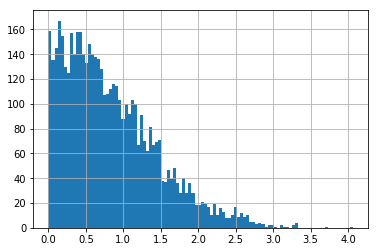

In [31]:
plot_vector_norm_distribution(1)

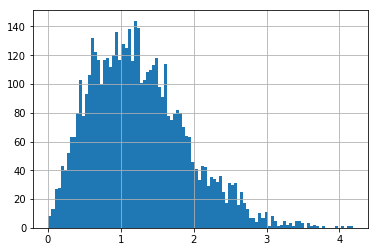

In [25]:
plot_vector_norm_distribution(2)

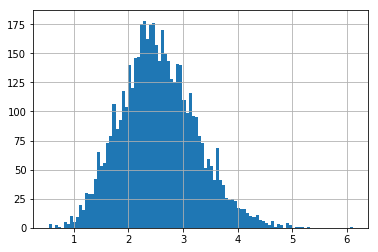

In [26]:
plot_vector_norm_distribution(7)

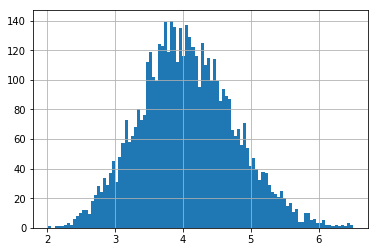

In [27]:
plot_vector_norm_distribution(17)

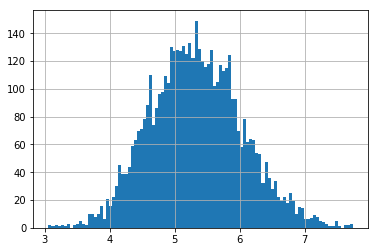

In [28]:
plot_vector_norm_distribution(29)

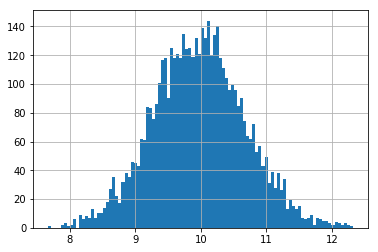

In [29]:
plot_vector_norm_distribution(100)

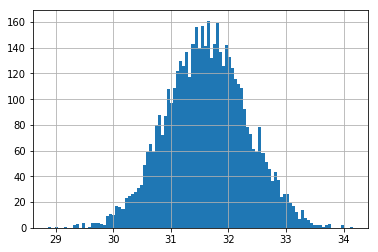

In [32]:
plot_vector_norm_distribution(1000)